In [1]:
from scipy.stats import kurtosis
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
my_random_state = 318
import time
import random

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder, normalize
from sklearn.metrics import accuracy_score,plot_confusion_matrix, confusion_matrix

from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_mutual_info_score
from sklearn.mixture import GaussianMixture

from sklearn.decomposition import PCA, FastICA, NMF
from sklearn.random_projection import GaussianRandomProjection as RP

clusterings = ['KMeans','EM']
dimReductions = ['PCA','ICA', 'RP', 'IG']

# data import and preprocessing


In [2]:
##### Adult Income
### http://archive.ics.uci.edu/ml/datasets/Adult
data = pd.read_csv('datafiles/adult.csv')
data

y_data_raw = data.income

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(y_data_raw.values.tolist())
y_data = le.transform(y_data_raw)


x_data_raw = data.loc[:,'age':'native-country']

from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
enc.fit(x_data_raw.values.tolist())
x_data = enc.transform(x_data_raw)


# x_data = normalize(x_data)

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, train_size=0.7, random_state=my_random_state, shuffle=True)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(22792, 14) (9769, 14) (22792,) (9769,)


In [3]:
x_data

array([[2.2000e+01, 7.0000e+00, 2.6710e+03, ..., 0.0000e+00, 3.9000e+01,
        3.9000e+01],
       [3.3000e+01, 6.0000e+00, 2.9260e+03, ..., 0.0000e+00, 1.2000e+01,
        3.9000e+01],
       [2.1000e+01, 4.0000e+00, 1.4086e+04, ..., 0.0000e+00, 3.9000e+01,
        3.9000e+01],
       ...,
       [4.1000e+01, 4.0000e+00, 7.8830e+03, ..., 0.0000e+00, 3.9000e+01,
        3.9000e+01],
       [5.0000e+00, 4.0000e+00, 1.2881e+04, ..., 0.0000e+00, 1.9000e+01,
        3.9000e+01],
       [3.5000e+01, 5.0000e+00, 1.7825e+04, ..., 0.0000e+00, 3.9000e+01,
        3.9000e+01]])

In [4]:
y_data_raw

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
32556     <=50K
32557      >50K
32558     <=50K
32559     <=50K
32560      >50K
Name: income, Length: 32561, dtype: object

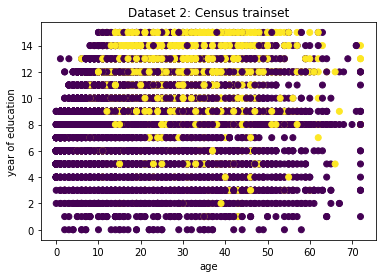

In [5]:
plt.scatter(x_train[:,0],x_train[:,4], c=y_train, cmap='viridis')
# plt.colorbar();  # show color scale
plt.title(f'Dataset 2: Census trainset')
plt.xlabel('age')
plt.ylabel('year of education')
# plt.ylabel('fnlwgt')
plt.savefig(f'part2/census.png')
plt.show()

In [6]:
y_test.tolist().count(0)

7377

In [7]:
y_test.tolist().count(1)

2392

# modify thisDR!!!

# modify DR function handle:

from sklearn.decomposition import PCA, FastICA, NMF

from sklearn.random_projection import GaussianRandomProjection as RP

In [8]:
thisDR = 'ICA' 
# 'initial' if no DR. Skip section 1 

# x_train_transform = x_train # default for 'initial'
# x_test_transform = x_test # default for 'initial'

# 1. Dimensionality Reduction

In [9]:
################################
DR = FastICA(#n_components = 16,
         random_state = my_random_state)

tic = time.perf_counter() 
DR.fit(normalize(x_train))
toc = time.perf_counter() 
# train_time[0] = toc-tic
print(f"Dimensionality Reduction Algorithm training time {toc - tic} seconds")
print()

Dimensionality Reduction Algorithm training time 0.3103347999999926 seconds



training time 0.009694299999978284 seconds
[9.07692231]

training time 0.013875900000016372 seconds
[8.80030019 8.61871332]

training time 0.02009570000001304 seconds
[7.11136586 8.96165167 6.86168959]

training time 0.016530900000020665 seconds
[9.00933331 8.02236306 5.39590788 7.68728844]

training time 0.019207900000026257 seconds
[0.7183338  8.94999358 8.30886933 9.05301487 8.11074419]

training time 0.018630300000012312 seconds
[8.07806054 5.44245684 8.9470101  9.05639167 9.01723663 8.30215982]

training time 0.05571639999999434 seconds
[5.86727724 8.63538412 9.05789    4.61494283 8.94043064 9.02348555
 4.96674857]

training time 0.05619959999998514 seconds
[2.90281117 1.68353244 8.63357753 8.72784017 9.05582951 4.52727024
 6.48116332 8.96422898]

training time 0.04932959999999298 seconds
[8.73244672 8.9161585  8.62872783 6.82594343 3.37569741 4.82418013
 3.32851925 6.6539135  4.64913846]

training time 0.04987829999998894 seconds
[3.25507397 1.18185854 3.15585005 7.3976725  8.832

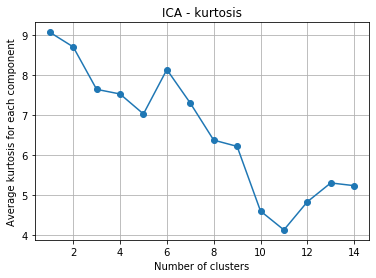

In [10]:
# Kurtosis
numfeatures = x_train.shape[1]
kurtosis_all = []
for i in range(1, 1+numfeatures):
    DR = FastICA(n_components = i, random_state = my_random_state)
    
    tic = time.perf_counter() 
    DR.fit(x_train)
    toc = time.perf_counter() 
    print(f"training time {toc - tic} seconds")
    
    kurt = kurtosis(DR.components_.T)
#     print(DR.components_)
    print(kurt)
    kurtosis_all.append(np.mean(kurt))
    x_train_transform = DR.fit_transform(x_train)
#     x_test_transform = DR.fit_transform(x_test)
    x_train_inverse = DR.inverse_transform(x_train_transform)
    print()

plt.figure()
plt.plot(range(1,1+numfeatures), kurtosis_all, marker = 'o')
plt.title(f'{thisDR} - kurtosis')
plt.xlabel('Number of clusters')
plt.ylabel('Average kurtosis for each component')
plt.grid()
plt.savefig(f'part2/{thisDR}_kurtosis.png')
plt.show()

In [ ]:
DR.explained_variance_ratio_

In [18]:
###############################
best_n_components = 6
bestDR = FastICA(n_components=best_n_components, random_state = my_random_state)
x_train_transform = bestDR.fit_transform(normalize(x_train))
x_test_transform = bestDR.fit_transform(normalize(x_test))
x_train_inverse = bestDR.inverse_transform(x_train_transform)

# Reconstruction Error
mse = np.sum(np.square(x_train - x_train_inverse))/x_train_inverse.size
print('MSE: ', mse)
#  MSE: 10540604.762368998 for n=2

MSE:  10540601.746984918


In [19]:
x_train_transform

array([[ 2.92425029e-05,  6.50742300e-04,  1.66213446e-03,
         7.71984016e-04,  4.61587750e-04,  5.02123259e-04],
       [ 3.38204521e-04,  5.99439536e-04,  5.62365120e-04,
         4.15470713e-04,  4.62454456e-04, -1.79155048e-04],
       [ 3.29586336e-04,  6.41757806e-04,  1.20815158e-03,
         1.15671524e-03,  4.57845652e-04,  1.28974735e-04],
       ...,
       [ 2.71458486e-03,  4.83793533e-04, -3.17299932e-03,
         2.49184757e-03,  3.44373542e-04, -4.90772479e-03],
       [ 8.87276694e-05,  6.27742151e-04,  1.15370419e-03,
         4.24454573e-04,  4.50409498e-04,  2.86256629e-04],
       [-3.42578794e-04,  6.20994837e-04,  1.18241895e-03,
        -4.80955036e-04,  4.42241857e-04,  1.13298354e-03]])

In [20]:
x_train_inverse

array([[9.16116372e-03, 1.69680844e-03, 9.95115196e-01, ...,
        7.67822287e-04, 1.80549690e-02, 1.64590732e-02],
       [8.97954332e-03, 1.48788664e-03, 9.94462061e-01, ...,
        7.83061194e-04, 1.58706446e-02, 1.44688884e-02],
       [9.57349819e-03, 1.64621411e-03, 9.94791668e-01, ...,
        7.70146175e-04, 1.79293184e-02, 1.56466213e-02],
       ...,
       [1.43386333e-02, 1.03091724e-03, 9.90607984e-01, ...,
        7.52394051e-04, 1.36140891e-02, 8.61609488e-03],
       [8.77378665e-03, 1.58220242e-03, 9.94928338e-01, ...,
        7.66952207e-04, 1.67133381e-02, 1.54640981e-02],
       [6.79770298e-03, 1.50366176e-03, 9.95626873e-01, ...,
        7.59927030e-04, 1.51791978e-02, 1.50933304e-02]])

# 2. after dimensional reduction: KMeans

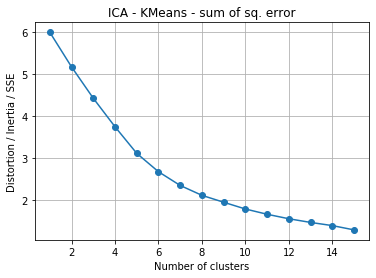

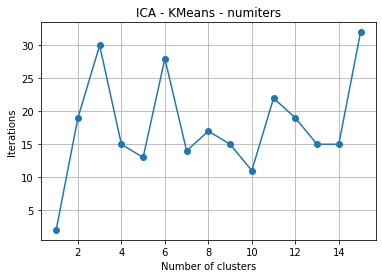

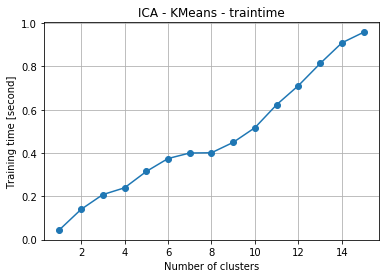

In [22]:
thisClust = 'KMeans'
# calculate distortion for a range of number of cluster
distortions = []
numiters = []
traintime = []
for i in range(1, 16):
    km = KMeans(n_clusters=i, 
                random_state=my_random_state)
    
    tic = time.perf_counter() 
    km.fit(x_train_transform)
    toc = time.perf_counter() 
    traintime.append(toc-tic)
    
    distortions.append(km.inertia_)
    numiters.append(km.n_iter_)

# plot
plt.figure()
plt.plot(range(1, 16), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion / Inertia / SSE')
plt.title(f'{thisDR} - {thisClust} - sum of sq. error')
plt.grid()
plt.savefig(f'part2/{thisDR}_{thisClust}_distortion.png')
plt.show()


# plot
plt.figure()
plt.plot(range(1, 16), numiters, marker='o')
plt.title(f'{thisDR} - {thisClust} - numiters')
plt.xlabel('Number of clusters')
plt.ylabel('Iterations')
plt.grid()
plt.savefig(f'part2/{thisDR}_{thisClust}_numiters.png')
plt.show()


# plot
plt.figure()
plt.plot(range(1, 16), traintime, marker='o')
plt.title(f'{thisDR} - {thisClust} - traintime')
plt.xlabel('Number of clusters')
plt.ylabel('Training time [second]')
plt.grid()
plt.savefig(f'part2/{thisDR}_{thisClust}_traintime.png')
plt.show()

## KMeans n=2
### compare with original labeling

In [23]:
km2 = KMeans(n_clusters = 2, random_state = my_random_state)


tic = time.perf_counter() 
km2.fit(x_train_transform)
toc = time.perf_counter() 
print(f"training time {toc - tic} seconds")
print()

print(km2.cluster_centers_)
print(km2.labels_)
print(km2.inertia_)
print(km2.n_iter_)

training time 0.15615709999997307 seconds

[[ 2.51440990e-04  8.83483400e-05  2.18508068e-05 -1.34205148e-04
   7.87639057e-05  6.66656159e-05]
 [-9.07143215e-02 -3.18741178e-02 -7.88328553e-03  4.84182351e-02
  -2.84162669e-02 -2.40514727e-02]]
[0 0 0 ... 0 0 0]
5.17636232471566
19


In [24]:
km2.labels_.tolist().count(1)

63

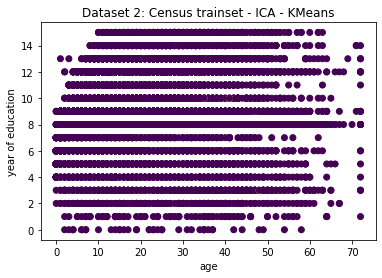

In [25]:

plt.scatter(x_train[:,0],x_train[:,4], c=km2.labels_, cmap='viridis')
# plt.colorbar();  # show color scale
plt.title(f'Dataset 2: Census trainset - {thisDR} - {thisClust}')
plt.xlabel('age')
plt.ylabel('year of education')
plt.savefig(f'part2/{thisDR}_{thisClust}_scatter_train4.png')
plt.show()

[[17302    41]
 [ 5427    22]]
Prediction accuracy on train set: 0.76009126009126


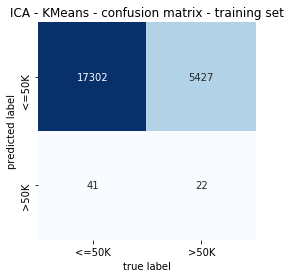

In [26]:
species = ['<=50K','>50K']

y_train_km2 = []
for l in km2.labels_:
    y_train_km2.append(species[l])
    
train_confmat_km2 = confusion_matrix(y_train, km2.labels_)
train_accu_km2 = accuracy_score(y_train, km2.labels_)
print(train_confmat_km2)
print(f"Prediction accuracy on train set: {train_accu_km2}")


import seaborn as sns
# species.reverse() # for plotting
sns.heatmap(train_confmat_km2.T, cmap=plt.cm.Blues, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=species, yticklabels=species)
plt.xlabel('true label')
plt.ylabel('predicted label')

plt.title(f'{thisDR} - {thisClust} - confusion matrix - training set')
plt.savefig(f'part2/{thisDR}_{thisClust}_confusion_train.png')

In [27]:
# Evaluate quality of clusters
print('training set')
print('Inertia: ', km2.inertia_)
score = silhouette_score(x_train_transform, km2.labels_)
print('Silhouette score: ', score)
ami = adjusted_mutual_info_score(y_train, km2.labels_)
# ami = adjusted_mutual_info_score(le.inverse_transform(y_train).reshape(-1), y_train_km2)
print('Adjusted Mutual Information (AMI) score: ', ami)

training set
Inertia:  5.17636232471566
Silhouette score:  0.9658518058085526
Adjusted Mutual Information (AMI) score:  0.00021975684760376621


In [28]:
tic = time.perf_counter() 
y_test_predict2 = km2.predict(x_test_transform)
toc = time.perf_counter() 
# test_time[0] = toc-tic
print(f"testing time {toc - tic} seconds")
print()
y_test_predict2

testing time 0.0017109000000345986 seconds



array([0, 0, 0, ..., 0, 0, 0])

In [29]:
y_test_predict2.tolist().count(0)

9769

[[7377    0]
 [2392    0]]
Prediction accuracy on test set: 0.7551438222950149


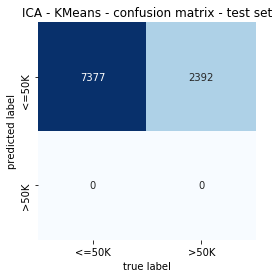

In [30]:

species = ['<=50K','>50K']
y_test_km2 = []
for pred in y_test_predict2:
    y_test_km2.append(species[pred])
    
# print(f"Prediction accuracy on test set: {accuracy_score(le.inverse_transform(y_test),y_test_km)}")
# # best_test_accuracy[0] = accuracy_score(y_test,y_test_dt)


test_confmat_km2 = confusion_matrix(y_test, y_test_predict2)
test_accu_km2 = accuracy_score(y_test, y_test_predict2)
print(test_confmat_km2)
print(f"Prediction accuracy on test set: {test_accu_km2}")


# species.reverse() # for plotting
sns.heatmap(test_confmat_km2.T, cmap=plt.cm.Blues, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=species, yticklabels=species)
plt.xlabel('true label')
plt.ylabel('predicted label')

plt.title(f'{thisDR} - {thisClust} - confusion matrix - test set')
plt.savefig(f'part2/{thisDR}_{thisClust}_confusion_test.png')



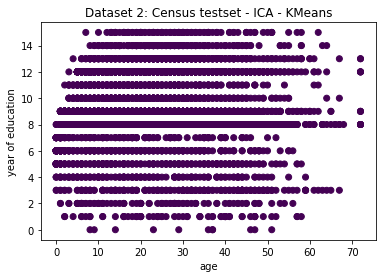

In [31]:
plt.scatter(x_test[:,0],x_test[:,4], c=y_test_predict2, cmap='viridis')
# plt.colorbar();  # show color scale
plt.title(f'Dataset 2: Census testset - {thisDR} - {thisClust}')
plt.xlabel('age')
plt.ylabel('year of education')
plt.savefig(f'part2/{thisDR}_{thisClust}_scatter_test4.png')
plt.show()

In [34]:
# Evaluate quality of clusters
print('test set')
import random as rand
y_test_predict2[rand.randint(0,9000)] = 1 # arbitrary, because no 1 was predicted
score = silhouette_score(x_test_transform, y_test_predict2)
print('Silhouette score: ', score)
ami = adjusted_mutual_info_score(le.inverse_transform(y_test).reshape(-1), y_test_km2)
print('Adjusted Mutual Information (AMI) score: ', ami)

test set
Silhouette score:  0.428712126619381
Adjusted Mutual Information (AMI) score:  0.0


## KMeans n=? 
### change best_n_clusters!  determined from graph

In [35]:
best_n_clusters = 6
km = KMeans(n_clusters = best_n_clusters, random_state = my_random_state)


tic = time.perf_counter() 
km.fit(x_train_transform)
toc = time.perf_counter() 
# train_time[0] = toc-tic
print(f"training time {toc - tic} seconds")
print()

print(km.cluster_centers_)
print(km.labels_)
print(km.inertia_)
print(km.n_iter_)

training time 0.4026400999998714 seconds

[[ 2.91257337e-04  2.97091756e-04  7.34962057e-04  2.07705361e-04
   1.81576235e-04  2.76223900e-04]
 [-7.94333942e-03  3.48159561e-04  1.22658355e-02  8.76005748e-03
  -2.63818541e-01 -2.98695750e-03]
 [-7.82404367e-03 -1.83910488e-01  7.67711329e-03  5.48021808e-03
   1.60660547e-04  3.95377162e-03]
 [-1.68419193e-01 -1.38790007e-03 -2.34567416e-04  3.31185361e-02
   2.50362460e-03  2.55163917e-02]
 [-1.79025401e-02 -4.64451935e-03 -1.80039602e-02  1.83918793e-02
  -3.19440933e-05 -8.74465260e-02]
 [-2.55102364e-03 -4.68396933e-03 -3.02022532e-02 -1.33113460e-02
  -2.31513147e-03 -1.71766229e-03]]
[0 0 0 ... 0 0 0]
2.6826465122465866
28


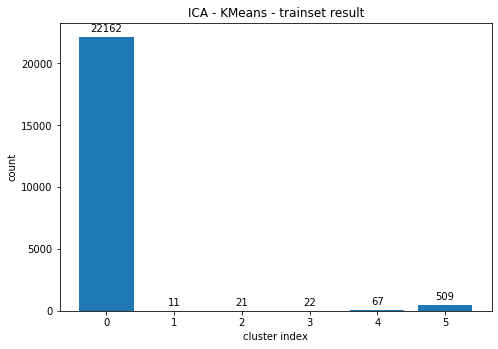

In [36]:
clusterindices = [str(e) for e in range(best_n_clusters)]
counts = np.zeros(best_n_clusters)
for p in km.labels_:
    counts[p] += 1

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
rects = ax.bar(clusterindices, counts)
plt.title(f'{thisDR} - {thisClust} - trainset result')
plt.xlabel('cluster index')
plt.ylabel('count')
plt.savefig(f'part2/{thisDR}_{thisClust}_train.png')

def autolabel2(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:0.0f}'.format(height),
                    xy=(rect.get_x() + rect.get_width()/2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel2(rects)

plt.show()


In [37]:
# Evaluate quality of clusters
print('training set')
print('Inertia: ', km.inertia_)
score = silhouette_score(x_train_transform, km.labels_)
print('Silhouette score: ', score)
# ami = adjusted_mutual_info_score(le.inverse_transform(y_train).reshape(-1), x_train_km)
ami = adjusted_mutual_info_score(le.inverse_transform(y_train).reshape(-1), km.labels_)
print('Adjusted Mutual Information (AMI) score: ', ami)

training set
Inertia:  2.6826465122465866
Silhouette score:  0.889475808763353
Adjusted Mutual Information (AMI) score:  0.0017887880309987133


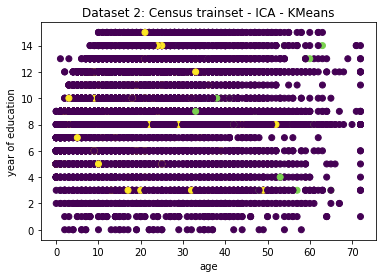

In [38]:

plt.scatter(x_train[:,0],x_train[:,4], c=km.labels_, cmap='viridis')
# plt.colorbar();  # show color scale
plt.title(f'Dataset 2: Census trainset - {thisDR} - {thisClust}')
plt.xlabel('age')
plt.ylabel('year of education')
plt.savefig(f'part2/{thisDR}_{thisClust}_scatter_train.png')
plt.show()

In [39]:


tic = time.perf_counter() 
y_test_predict = km.predict(x_test_transform)
toc = time.perf_counter() 
# test_time[0] = toc-tic
print(f"testing time {toc - tic} seconds")
print()

y_test_predict

testing time 0.002846099999942453 seconds



array([0, 0, 0, ..., 0, 0, 0])

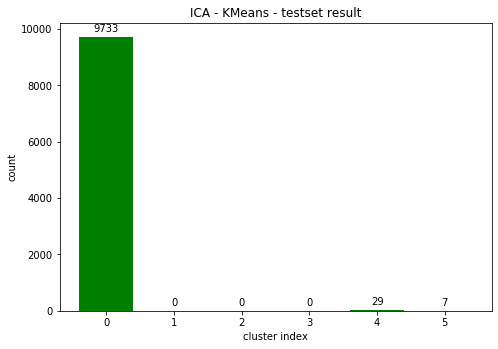

In [40]:
clusterindices = [str(e) for e in range(best_n_clusters)]
counts = np.zeros(best_n_clusters)
for p in y_test_predict:
    counts[p] += 1

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
rects = ax.bar(clusterindices, counts, color = 'green')
plt.title(f'{thisDR} - {thisClust} - testset result')
plt.xlabel('cluster index')
plt.ylabel('count')
plt.savefig(f'part2/{thisDR}_{thisClust}_test.png')
def autolabel2(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:0.0f}'.format(height),
                    xy=(rect.get_x() + rect.get_width()/2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel2(rects)

plt.show()


In [41]:
# Evaluate quality of clusters
print('test set')
# test_accu_km = accuracy_score(le.inverse_transform(y_test), y_test_gm)
# print(f"Prediction accuracy on test set: {test_accu_gm}")
score = silhouette_score(x_test_transform, y_test_predict)
print('Silhouette score: ', score)
ami = adjusted_mutual_info_score(le.inverse_transform(y_test).reshape(-1), y_test_predict)
print('Adjusted Mutual Information (AMI) score: ', ami)

test set
Silhouette score:  0.9337428562407974
Adjusted Mutual Information (AMI) score:  0.0005648355507476603


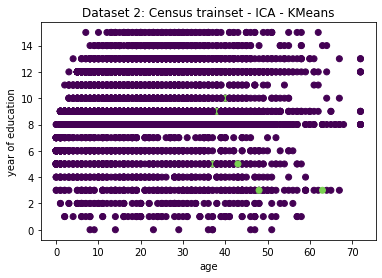

In [42]:

plt.scatter(x_test[:,0],x_test[:,4], c=y_test_predict, cmap='viridis')
# plt.colorbar();  # show color scale
plt.title(f'Dataset 2: Census trainset - {thisDR} - {thisClust}')
plt.xlabel('age')
plt.ylabel('year of education')
plt.savefig(f'part2/{thisDR}_{thisClust}_scatter_test.png')
plt.show()

# 3. after dimensional reduction: Expectation Maximization (EM)

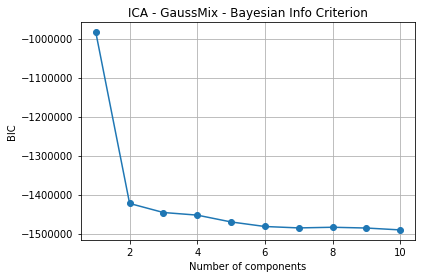

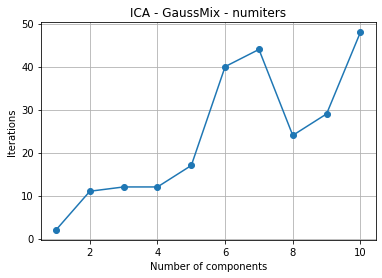

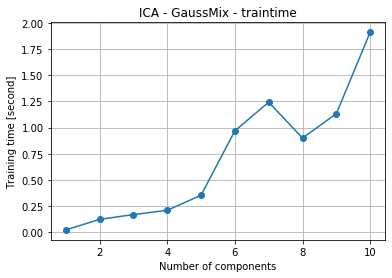

In [43]:
thisClust = 'GaussMix'
#  Find the optimal number of components using BIC
n_components_grid = np.arange(1, 11)
# bic = np.zeros(n_components_grid.size)
bic = []
numiters = []
traintime = []

# for idx, n_components in enumerate(n_components_grid):
for n_components in n_components_grid:
    gm = GaussianMixture(n_components=n_components, random_state=my_random_state)
    
    tic = time.perf_counter() 
    gm.fit(x_train_transform)
    toc = time.perf_counter() 
    traintime.append(toc-tic)
    
    numiters.append(gm.n_iter_)
    bic.append(gm.bic(x_train_transform))
#     bic[idx] = gm.bic(x_train)
print()


# Plot BIC vs number of components
plt.figure()
plt.plot(n_components_grid, bic, marker='o')
# plt.xticks(k_grid)
plt.title(f'{thisDR} - {thisClust} - Bayesian Info Criterion')
plt.xlabel('Number of components')
plt.ylabel('BIC')
plt.grid()
plt.savefig(f'part2/{thisDR}_{thisClust}_bic.png')

# plot
plt.figure()
plt.plot(n_components_grid, numiters, marker='o')
plt.title(f'{thisDR} - {thisClust} - numiters')
plt.xlabel('Number of components')
plt.ylabel('Iterations')
plt.grid()
plt.savefig(f'part2/{thisDR}_{thisClust}_numiters.png')
plt.show()


# plot
plt.figure()
plt.plot(n_components_grid, traintime, marker='o')
plt.title(f'{thisDR} - {thisClust} - traintime')
plt.xlabel('Number of components')
plt.ylabel('Training time [second]')
plt.grid()
plt.savefig(f'part2/{thisDR}_{thisClust}_traintime.png')
plt.show()

## Gaussian Mixture best_n_component = 2
### compare with original labeling

In [44]:
# the best n_clusters determined to be 4 (same as the original labeling)

best_n_component = 2
gm2 = GaussianMixture(n_components=best_n_component, random_state=my_random_state)


tic = time.perf_counter() 
gm2.fit(x_train_transform)
toc = time.perf_counter() 

print(f"training time {toc - tic} seconds")
print()

y_train_predict2 = gm2.predict(x_train_transform)
y_train_predict2

training time 0.13351349999993545 seconds



array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [45]:
y_train

array([0, 0, 0, ..., 1, 1, 0])

In [46]:
y_train_predict2.tolist().count(1)

1621

[[16224  1119]
 [ 4947   502]]
Prediction accuracy on train set: 0.7338539838539838


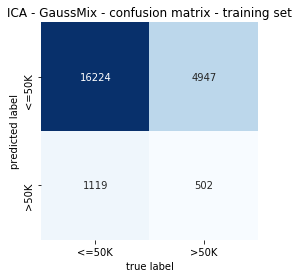

In [47]:
species = ['<=50K','>50K']

# y_train_gm2 = []
# for l in y_train_predict2:
#     y_train_gm2.append(species[l])

# y_train_predict2 = -1*(y_train_predict2 - 1) # inverse 0 & 1 if necessary

train_confmat_gm2 = confusion_matrix(y_train, y_train_predict2)
train_accu_gm2 = accuracy_score(y_train, y_train_predict2)
print(train_confmat_gm2)
print(f"Prediction accuracy on train set: {train_accu_gm2}")


# species.reverse() # for plotting
sns.heatmap(train_confmat_gm2.T, cmap=plt.cm.Blues, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=species, yticklabels=species)
plt.xlabel('true label')
plt.ylabel('predicted label')

plt.title(f'{thisDR} - {thisClust} - confusion matrix - training set')
plt.savefig(f'part2/{thisDR}_{thisClust}_confusion_train.png')

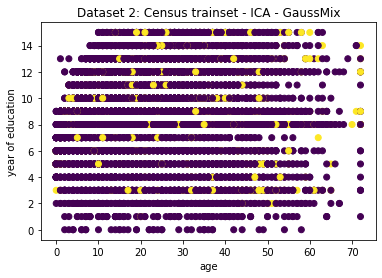

In [48]:

plt.scatter(x_train[:,0],x_train[:,4], c=y_train_predict2, cmap='viridis')
# plt.colorbar();  # show color scale
plt.title(f'Dataset 2: Census trainset - {thisDR} - {thisClust}')
plt.xlabel('age')
plt.ylabel('year of education')
plt.savefig(f'part2/{thisDR}_{thisClust}_scatter_train4.png')
plt.show()

In [49]:
# Evaluate quality of clusters
print('training set')
# print('Inertia: ', km2.inertia_)
score = silhouette_score(x_train_transform, y_train_predict2)
print('Silhouette score: ', score)
ami = adjusted_mutual_info_score(le.inverse_transform(y_train).reshape(-1), y_train_predict2)
print('Adjusted Mutual Information (AMI) score: ', ami)

training set
Silhouette score:  0.8338849881062064
Adjusted Mutual Information (AMI) score:  0.0024089532003333703


In [50]:

tic = time.perf_counter() 
y_test_predict2 = gm2.predict(x_test_transform)
toc = time.perf_counter() 
# test_time[0] = toc-tic
print(f"testing time {toc - tic} seconds")
print()

y_test_predict2

testing time 0.0016522999999324384 seconds



array([1, 1, 1, ..., 0, 0, 1], dtype=int64)

In [51]:
y_test

array([0, 1, 1, ..., 0, 0, 0])

[[6729  648]
 [2013  379]]
Prediction accuracy on train set: 0.7276077387654827


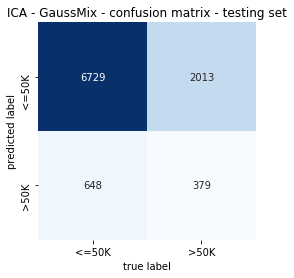

In [52]:
species = ['<=50K','>50K']

# y_test_predict2 = -1*(y_test_predict2 - 1) # inverse 0 & 1 if necessary

test_confmat_gm2 = confusion_matrix(y_test, y_test_predict2)
test_accu_gm2 = accuracy_score(y_test, y_test_predict2)
print(test_confmat_gm2)
print(f"Prediction accuracy on test set: {test_accu_gm2}")


# species.reverse() # for plotting
sns.heatmap(test_confmat_gm2.T, cmap=plt.cm.Blues, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=species, yticklabels=species)
plt.xlabel('true label')
plt.ylabel('predicted label')

plt.title(f'{thisDR} - {thisClust} - confusion matrix - testing set')
plt.savefig(f'part2/{thisDR}_{thisClust}_confusion_test.png')

In [53]:
# Evaluate quality of clusters
print('test set')
# test_accu_km = accuracy_score(le.inverse_transform(y_test), y_test_gm)
# print(f"Prediction accuracy on test set: {test_accu_gm}")
score = silhouette_score(x_test_transform, y_test_predict2)
print('Silhouette score: ', score)
ami = adjusted_mutual_info_score(le.inverse_transform(y_test).reshape(-1), y_test_predict2)
print('Adjusted Mutual Information (AMI) score: ', ami)

test set
Silhouette score:  0.7755658667445572
Adjusted Mutual Information (AMI) score:  0.010011722747536035


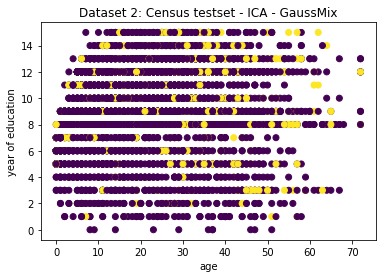

In [54]:
plt.scatter(x_test[:,0],x_test[:,4], c=y_test_predict2, cmap='viridis')
# plt.colorbar();  # show color scale
plt.title(f'Dataset 2: Census testset - {thisDR} - {thisClust}')
plt.xlabel('age')
plt.ylabel('year of education')
plt.savefig(f'part2/{thisDR}_{thisClust}_scatter_test4.png')
plt.show()



## Gaussian Mixture best_n_component = ?
### change best_n_component!  determined from graph

In [55]:
best_n_component = 5
gm = GaussianMixture(n_components=best_n_component, random_state=my_random_state)


tic = time.perf_counter() 
gm.fit(x_train_transform)
toc = time.perf_counter() 

print(f"training time {toc - tic} seconds")
print()

y_train_predict = gm.predict(x_train_transform)
y_train_predict

training time 0.3637920999999551 seconds



array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [56]:
# Evaluate quality of clusters
print('training set')
score = silhouette_score(x_train_transform, y_train_predict)
print('Silhouette score: ', score)
ami = adjusted_mutual_info_score(le.inverse_transform(y_train).reshape(-1), y_train_predict)
print('Adjusted Mutual Information (AMI) score: ', ami)
# print(f"Prediction accuracy on train set: {accuracy_score(le.inverse_transform(y_train),y_train_predict)}")

training set
Silhouette score:  0.7045244585157168
Adjusted Mutual Information (AMI) score:  0.016362717443235145


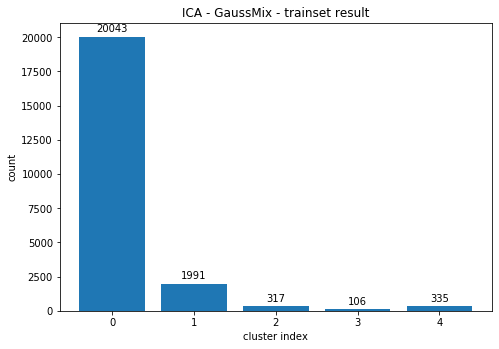

In [57]:
clusterindices = [str(e) for e in range(best_n_component)]
counts = np.zeros(best_n_component)
for yp in y_train_predict:
    counts[yp] += 1

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
rects = ax.bar(clusterindices,counts)

def autolabel2(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:0.0f}'.format(height),
                    xy=(rect.get_x() + rect.get_width()/2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel2(rects)

plt.title(f'{thisDR} - {thisClust} - trainset result')
plt.xlabel('cluster index')
plt.ylabel('count')
plt.savefig(f'part2/{thisDR}_{thisClust}_train.png')
plt.show()

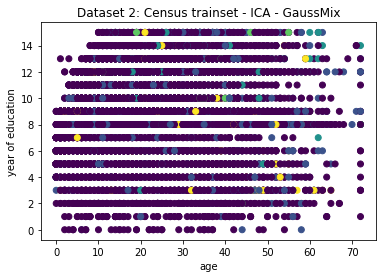

In [58]:
plt.scatter(x_train[:,0],x_train[:,4], c=y_train_predict, cmap='viridis')
# plt.colorbar();  # show color scale
plt.title(f'Dataset 2: Census trainset - {thisDR} - {thisClust}')
plt.xlabel('age')
plt.ylabel('year of education')
plt.savefig(f'part2/{thisDR}_{thisClust}_scatter_train.png')
plt.show()

In [59]:


tic = time.perf_counter() 
y_test_predict = gm.predict(x_test_transform)
toc = time.perf_counter() 
# test_time[0] = toc-tic
print(f"testing time {toc - tic} seconds")
print()

y_test_predict

testing time 0.003599599999915881 seconds



array([1, 2, 3, ..., 0, 0, 1], dtype=int64)

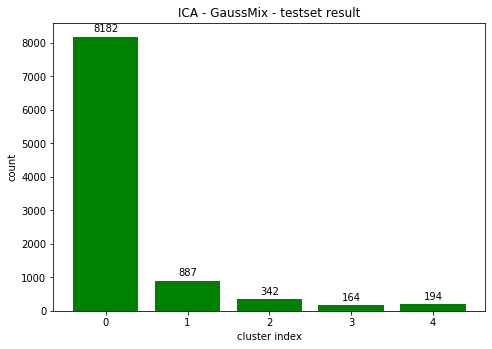

In [60]:
clusterindices = [str(e) for e in range(best_n_component)]
counts = np.zeros(best_n_component)
for p in y_test_predict:
    counts[p] += 1

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
rects = ax.bar(clusterindices, counts, color = 'green')
plt.title(f'{thisDR} - {thisClust} - testset result')
plt.xlabel('cluster index')
plt.ylabel('count')
plt.savefig(f'part2/{thisDR}_{thisClust}_test.png')
def autolabel2(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:0.0f}'.format(height),
                    xy=(rect.get_x() + rect.get_width()/2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel2(rects)

plt.show()


In [61]:
# Evaluate quality of clusters
print('test set')
# test_accu_km = accuracy_score(le.inverse_transform(y_test), y_test_gm)
# print(f"Prediction accuracy on test set: {test_accu_gm}")
score = silhouette_score(x_test_transform, y_test_predict)
print('Silhouette score: ', score)
ami = adjusted_mutual_info_score(le.inverse_transform(y_test).reshape(-1), y_test_predict)
print('Adjusted Mutual Information (AMI) score: ', ami)

test set
Silhouette score:  0.5775609421825832
Adjusted Mutual Information (AMI) score:  0.017524918686326572


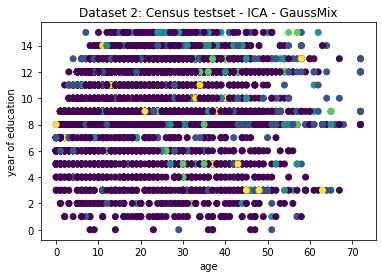

In [62]:
plt.scatter(x_test[:,0],x_test[:,4], c=y_test_predict, cmap='viridis')
# plt.colorbar();  # show color scale
plt.title(f'Dataset 2: Census testset - {thisDR} - {thisClust}')
plt.xlabel('age')
plt.ylabel('year of education')
plt.savefig(f'part2/{thisDR}_{thisClust}_scatter_test.png')
plt.show()